# Consistance Tests: SED

This is going to be the figure that shows that this is self consistent with regard to the selected model having an SED that matches the data. It will be 6 sub-plots each showing the selected model's SED and the data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import fsps
from astropy.cosmology import FlatLambdaCDM

In [23]:
import seaborn as sns
from matplotlib.ticker import MultipleLocator

set up cosmology to get age of the universe at the observed redshift to know when to stop the stellar popultion. -- define A(z) better.

Also define the FSPS object and other useful values like the x-axis for plotting.

In [3]:
cosmo = FlatLambdaCDM(H0=70, Om0=0.27)

In [4]:
sp = fsps.StellarPopulation(zcontinuous=2, cloudy_dust=True, add_neb_emission = True, sfh=5)

In [5]:
wavelengths = [3551, 4686, 6166, 7480, 8932]    # for u, g, r, i, z filters
filters = ['u', 'g', 'r', 'i', 'z']

Define data and best fit models

In [6]:
data = {
    1 : np.array([20.36, 18.76, 17.99, 17.67, 17.39]),
    2 : np.array([20.31, 18.74, 17.98, 17.66, 17.39]),
    3 : np.array([16.15, 15.43, 15.4, 15.19, 15.21]),
    4 : np.array([17.65, 16.74, 16.49, 16.26, 16.16]),
    5 : np.array([19.69, 18.29, 17.7, 17.45, 17.29]),
    6 : np.array([17.66, 16.58, 16.25, 16.01, 15.86]),
    7 : np.array([17.62, 16.80, 16.57, 16.34, 16.26]),
    8 : np.array([19.72, 18.37, 17.88, 17.68, 17.56])
}

uncert = {
    1 : np.array([0.1, 0.1, 0.1, 0.1, 0.1]),
    2 : np.array([0.1, 0.1, 0.1, 0.1, 0.1]),
    3 : np.array([0.1, 0.1,0.1, 0.1, 0.1]),
    4 : np.array([0.1, 0.1, 0.1, 0.1, 0.1]),
    5 : np.array([0.1, 0.1,0.1, 0.1, 0.1]),
    6 : np.array([0.1, 0.1, 0.1, 0.1, 0.1]), 
    7 : np.array([0.1, 0.1, 0.1, 0.1, 0.1]),
    8 : np.array([0.1, 0.1, 0.1, 0.1, 0.1])
}

# logz, t_dust, tau, t_start, t_trans, sf_slope
# from 2017-10-02 job 277287.1-6:1
# model = {
#     1 : np.array([0.46, 0.17, 5.22, 1.41, 5.27, -0.88]),  # should be negative metalicity??
#     2 : np.array([-0.56, 0.18, 0.53, 2.11, 10.43, -0.44]),
#     3 : np.array([-0.67, 0.10, 7.8, 4.35, 10.93, 1.16]),
#     4 : np.array([-0.47, 0.17, 5.57, 2.4, 7.81, 0.08]),
#     5 : np.array([-1.1, 0.1, 7.71, 2.63, 8.87, -0.96]),
#     6 : np.array([-0.38, 0.43, 7.35, 6.60, 11.41, -0.03])
# }

# c = {
#     1 : -24.93,
#     2 : -24.98,
#     3 : -25.23,
#     4 : -24.98,
#     5 : -24.63,
#     6 : -25.24
# }

# logz, t_dust, tau, t_start, t_trans, phi
# from 2017-12-19 crcjob 423492
model = {
    1 : np.array([-0.50, 0.18, 0.67, 2.1, 9.50, -0.65]), # very different, but much more accurat values
    2 : np.array([-0.55, 0.19, 0.66, 2.0, 9.66, -0.53]), # very differnet
    3 : np.array([-0.70, 0.09, 5.95, 8.80, 12.34, 0.68]),
    4 : np.array([-0.48, 0.19, 5.81, 3.92, 12.17, 0.34]),
    5 : np.array([-1.15, 0.12, 5.04, 3.56, 8.20, -0.83]),
    6 : np.array([-0.39, 0.35, 6.90, 4.98, 12.66, -0.03]),
    7 : np.array([-0.44, 0.1, 5.80, 2.29, 9.04, 0.08]),
    8 : np.array([-1.44, 0.09, 4.70, 4.8, 10.24, -0.77])
}

c = {
    1 : -24.97,
    2 : -24.97,
    3 : -25.15,
    4 : -24.96,
    5 : -24.65,
    6 : -25.37,
    7 : -24.85,
    8 : -24.12
}

redshift = 0.05

Get the SED for the model.

In [7]:
def get_sed(sp, redshift, logzsol, dust2, tau, tStart, sfTrans, phi):
    """same as `calculateAge.runFSPS()` as of 2017-10-05
    """
    sdss_bands = ['sdss_u', 'sdss_g', 'sdss_r', 'sdss_i', 'sdss_z']

    sp.params['logzsol'] = logzsol
    
    dust1 = 2.0*dust2
    sp.params['dust1'] = dust1
    sp.params['dust2'] = dust2

    sp.params['tau'] = tau
    sp.params['sf_start'] = tStart
    sp.params['sf_trunc'] = sfTrans
    sp.params['sf_slope'] = np.tan(phi)

    tage = cosmo.age(redshift).to('Gyr').value

    return sp.get_mags(tage=tage, redshift=redshift, bands=sdss_bands)

In [48]:
model_sed = {}
for i in range(1, 9):
    model_sed[i] = get_sed(sp, redshift, *model[i])

In [49]:
model_sed

{1: array([ 45.37121439,  43.76775616,  42.99677118,  42.66826793,  42.38852051]),
 2: array([ 45.35380122,  43.75999082,  42.99411528,  42.66825383,  42.39588892]),
 3: array([ 41.2091081 ,  40.56786111,  40.50852559,  40.28538903,  40.33946123]),
 4: array([ 42.60277997,  41.71119391,  41.44222801,  41.20459033,  41.11322706]),
 5: array([ 44.36039765,  42.94471411,  42.35179828,  42.10326953,  41.93914351]),
 6: array([ 42.9863323 ,  41.94151475,  41.59121691,  41.3455692 ,  41.20011147]),
 7: array([ 42.56372008,  41.7108555 ,  41.45585404,  41.22373141,  41.1350274 ]),
 8: array([ 43.84471772,  42.48006939,  41.99291888,  41.78886315,  41.65840406])}

Make the figure

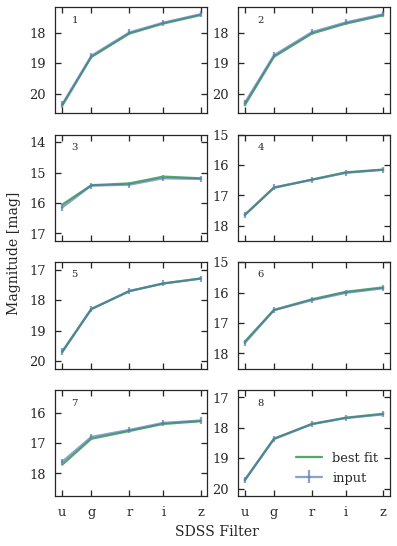

In [84]:
plt.figure('SED Consistence Test')

sns.set(context='talk', style='ticks', font='serif', color_codes=True)

# row and column sharing
# ???sharey=True,
f, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, sharex='col', figsize=(6, 9))

# add uncertainty
ax1.errorbar(wavelengths, data[1], yerr=uncert[1], alpha=0.65)
ax1.plot(wavelengths, model_sed[1] + c[1])
ax1.invert_yaxis()
ax1.tick_params(axis='both', which='both', top='on', right='on', direction='in')
# ax1.set_ylim(20.75, 16.25)
# ax1.set_title('1')
# ax1.text(0.5, 0.5, '1')
ax1.yaxis.set_major_locator(MultipleLocator(1))
ax1.set_ylim(20.65, 17.15)

ax2.errorbar(wavelengths, data[2], yerr=uncert[2], alpha=0.65)
ax2.plot(wavelengths, model_sed[2] + c[2])
ax2.invert_yaxis()
ax2.tick_params(axis='both', which='both', top='on', right='on', direction='in')
# ax2.set_ylim(20.6, 17.1)
ax2.yaxis.set_major_locator(MultipleLocator(1))
ax2.set_ylim(20.65, 17.15)

ax3.errorbar(wavelengths, data[3], yerr=uncert[3], alpha=0.65)
ax3.plot(wavelengths, model_sed[3] + c[3])
ax3.invert_yaxis()
ax3.tick_params(axis='both', which='both', top='on', right='on', direction='in')
ax3.yaxis.set_major_locator(MultipleLocator(1))
# ax3.set_ylim((16.5, 14.5))  # Good if we are not using a consistent 3.5 mag range
# ax3.set_ylim((17.25, 13.75))  # Tick marks are evenly spaced from top and bottom axes
ax3.set_ylim((17.25, 13.75))


ax4.errorbar(wavelengths, data[4], yerr=uncert[4], alpha=0.65)
ax4.plot(wavelengths, model_sed[4] + c[4])
ax4.invert_yaxis()
ax4.tick_params(axis='both', which='both', top='on', right='on', direction='in')
ax4.yaxis.set_major_locator(MultipleLocator(1))
# ax4.set_ylim((17.9, 15.8))    # Good if we are not using a consistent 3.5 mag range
# ax4.set_ylim((18.25, 14.75))  # Tick marks are evenly spaced from top and bottom axes
ax4.set_ylim((18.5, 15))


ax5.errorbar(wavelengths, data[5], yerr=uncert[5], alpha=0.65)
ax5.plot(wavelengths, model_sed[5] + c[5])
ax5.invert_yaxis()
ax5.tick_params(axis='both', which='both', top='on', right='on', direction='in')
ax5.set_ylim((20.25, 16.75))

ax6.errorbar(wavelengths, data[6], yerr=uncert[6], alpha=0.65)
ax6.plot(wavelengths, model_sed[6] + c[6])
ax6.invert_yaxis()
ax6.tick_params(axis='both', which='both', top='on', right='on', direction='in')
ax6.set_ylim((18.5, 15))

ax7.errorbar(wavelengths, data[7], yerr=uncert[7], alpha=0.65)
ax7.plot(wavelengths, model_sed[7] + c[7])
ax7.invert_yaxis()
ax7.tick_params(axis='both', which='both', top='on', right='on', direction='in')
ax7.yaxis.set_major_locator(MultipleLocator(1))
# ax7.set_ylim((18.2, 15.8))   #good tighter
ax7.set_ylim((18.75, 15.25))

ax8.errorbar(wavelengths, data[8], yerr=uncert[8], alpha=0.65, label='input')
ax8.plot(wavelengths, model_sed[8] + c[8], label='best fit')
ax8.invert_yaxis()
ax8.tick_params(axis='both', which='both', top='on', right='on', direction='in')
# ax8.yaxis.set_major_locator(MultipleLocator(0.5))
ax8.set_ylim((20.25, 16.75))



plt.legend()


ax7.set_xticks(wavelengths)
ax7.set_xticklabels(filters)
ax8.set_xticks(wavelengths)
ax8.set_xticklabels(filters)

# ax3.set_ylabel('Magnitude [mag]', size=14)
f.text(0.03, 0.5, 'Magnitude [mag]', ha='center', va='center', size=14, rotation=90)
# ax5.set_xlabel('SDSS Filters')
# ax6.set_xlabel('SDSS Filters')
# https://stackoverflow.com/questions/6963035/pyplot-axes-labels-for-subplots
f.text(0.5, 0.07, 'SDSS Filter', ha='center', va='center', size=14)


# lable figures
f.text(0.17, 0.86, '1', ha='center', va='center', size=10)
f.text(0.60, 0.86, '2', ha='center', va='center', size=10)
f.text(0.17, 0.664, '3', ha='center', va='center', size=10)
f.text(0.60, 0.664, '4', ha='center', va='center', size=10)
f.text(0.17, 0.468, '5', ha='center', va='center', size=10)
f.text(0.60, 0.468, '6', ha='center', va='center', size=10)
f.text(0.17, 0.268, '7', ha='center', va='center', size=10)
f.text(0.60, 0.268, '8', ha='center', va='center', size=10)

# # add ages
# f.text(0.3, 0.73, '10.7 Gyr', ha='center', va='center', size=10)
# f.text(0.72, 0.73, '1.4 Gyr', ha='center', va='center', size=10)
# f.text(0.3, 0.53, '1.8 Gyr', ha='center', va='center', size=10)
# f.text(0.72, 0.53, '4.3 Gyr', ha='center', va='center', size=10)
# f.text(0.3, 0.33, '10.7 Gyr', ha='center', va='center', size=10)
# f.text(0.72, 0.33, '1.8 Gyr', ha='center', va='center', size=10)
# f.text(0.3, 0.13, '2.4 Gyr', ha='center', va='center', size=10)
# f.text(0.72, 0.13, '0.44 Gyr', ha='center', va='center', size=10)



# ax1.set_title('Sharing x per column, y per row')
# ax2.scatter(x, y)
# ax3.scatter(x, 2 * y ** 2 - 1, color='r')
# ax4.plot(x, 2 * y ** 2 - 1, color='r')

#cutting white space does not work for these sub figures
# f.set_tight_layout({'pad': 1.5})   #cut edge whitespace
plt.savefig('consistancy_sed.pdf')
plt.show()

## Understaning why data does not use `get_sed()`

Why did I just use data that defined the SED's rather than recalculating them just like I did for the best fit model? Lets look at what the SED would be given our data star formation hisotry (currently table 4 in the paper).

In [51]:
# test that data is correct SED's to fit.
data_sfh = {
    1 : np.array([-0.5, 0.1, 0.5, 1.5, 9.0, -0.785]),
    2 : np.array([-0.5, 0.1, 0.5, 1.5, 9.0, 1.504]),
    3 : np.array([-0.5, 0.1, 7.0, 3.0, 10., 1.504]),
    4 : np.array([-0.5, 0.1, 7.0, 3.0, 13., 0.0]),
    5 : np.array([-1.5, 0.1, 0.5, 1.5, 9.0, -0.785]),
    6 : np.array([-0.5, 0.8, 7.0, 3.0, 10., 1.504]),
    7 : np.array([-0.5, 0.1, 0.5, 1.5, 6.0, 1.504]),
    8 : np.array([-0.5, 0.1, 0.1, 8.0, 12.0, 1.52])
}


data_sed = {}
for i in range(1, 9):
    data_sed[i] = get_sed(sp, redshift, *model[i]) - 25
    
data_sed

{1: array([ 20.37121439,  18.76775616,  17.99677118,  17.66826793,  17.38852051]),
 2: array([ 20.35380122,  18.75999082,  17.99411528,  17.66825383,  17.39588892]),
 3: array([ 16.2091081 ,  15.56786111,  15.50852559,  15.28538903,  15.33946123]),
 4: array([ 17.60277997,  16.71119391,  16.44222801,  16.20459033,  16.11322706]),
 5: array([ 19.36039765,  17.94471411,  17.35179828,  17.10326953,  16.93914351]),
 6: array([ 17.9863323 ,  16.94151475,  16.59121691,  16.3455692 ,  16.20011147]),
 7: array([ 17.56372008,  16.7108555 ,  16.45585404,  16.22373141,  16.1350274 ]),
 8: array([ 18.84471772,  17.48006939,  16.99291888,  16.78886315,  16.65840406])}

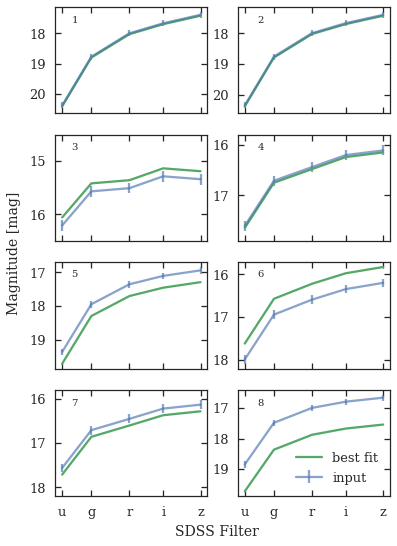

In [54]:
plt.figure('SED Consistence Test')

sns.set(context='talk', style='ticks', font='serif', color_codes=True)

# row and column sharing
# ???sharey=True,
f, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, sharex='col', figsize=(6, 9))

# add uncertainty
ax1.errorbar(wavelengths, data_sed[1], yerr=uncert[1], alpha=0.65)
ax1.plot(wavelengths, model_sed[1] + c[1])
ax1.invert_yaxis()
ax1.tick_params(axis='both', which='both', top='on', right='on', direction='in')
# ax1.set_title('1')
# ax1.text(0.5, 0.5, '1')

ax2.errorbar(wavelengths, data_sed[2], yerr=uncert[2], alpha=0.65)
ax2.plot(wavelengths, model_sed[2] + c[2])
ax2.invert_yaxis()
ax2.tick_params(axis='both', which='both', top='on', right='on', direction='in')

ax3.errorbar(wavelengths, data_sed[3], yerr=uncert[3], alpha=0.65)
ax3.plot(wavelengths, model_sed[3] + c[3])
ax3.invert_yaxis()
ax3.tick_params(axis='both', which='both', top='on', right='on', direction='in')
ax3.yaxis.set_major_locator(MultipleLocator(1))
ax3.set_ylim((16.5, 14.5))
# ax3.set_title('3')

ax4.errorbar(wavelengths, data_sed[4], yerr=uncert[4], alpha=0.65)
ax4.plot(wavelengths, model_sed[4] + c[4])
ax4.invert_yaxis()
ax4.tick_params(axis='both', which='both', top='on', right='on', direction='in')
ax4.yaxis.set_major_locator(MultipleLocator(1))
ax4.set_ylim((17.9, 15.8))
# ax4.set_title('4')

ax5.errorbar(wavelengths, data_sed[5], yerr=uncert[5], alpha=0.65)
ax5.plot(wavelengths, model_sed[5] + c[5])
ax5.invert_yaxis()
ax5.tick_params(axis='both', which='both', top='on', right='on', direction='in')

ax6.errorbar(wavelengths, data_sed[6], yerr=uncert[6], alpha=0.65)
ax6.plot(wavelengths, model_sed[6] + c[6])
ax6.invert_yaxis()
ax6.tick_params(axis='both', which='both', top='on', right='on', direction='in')

ax7.errorbar(wavelengths, data_sed[7], yerr=uncert[7], alpha=0.65)
ax7.plot(wavelengths, model_sed[7] + c[7])
ax7.invert_yaxis()
ax7.tick_params(axis='both', which='both', top='on', right='on', direction='in')
ax7.yaxis.set_major_locator(MultipleLocator(1))
ax7.set_ylim((18.2, 15.8))

ax8.errorbar(wavelengths, data_sed[8], yerr=uncert[8], alpha=0.65, label='input')
ax8.plot(wavelengths, model_sed[8] + c[8], label='best fit')
ax8.invert_yaxis()
ax8.tick_params(axis='both', which='both', top='on', right='on', direction='in')
# ax8.yaxis.set_major_locator(MultipleLocator(0.5))



plt.legend()


ax7.set_xticks(wavelengths)
ax7.set_xticklabels(filters)
ax8.set_xticks(wavelengths)
ax8.set_xticklabels(filters)

# ax3.set_ylabel('Magnitude [mag]', size=14)
f.text(0.03, 0.5, 'Magnitude [mag]', ha='center', va='center', size=14, rotation=90)
# ax5.set_xlabel('SDSS Filters')
# ax6.set_xlabel('SDSS Filters')
# https://stackoverflow.com/questions/6963035/pyplot-axes-labels-for-subplots
f.text(0.5, 0.07, 'SDSS Filter', ha='center', va='center', size=14)


# lable figures
f.text(0.17, 0.86, '1', ha='center', va='center', size=10)
f.text(0.60, 0.86, '2', ha='center', va='center', size=10)
f.text(0.17, 0.664, '3', ha='center', va='center', size=10)
f.text(0.60, 0.664, '4', ha='center', va='center', size=10)
f.text(0.17, 0.468, '5', ha='center', va='center', size=10)
f.text(0.60, 0.468, '6', ha='center', va='center', size=10)
f.text(0.17, 0.268, '7', ha='center', va='center', size=10)
f.text(0.60, 0.268, '8', ha='center', va='center', size=10)


plt.show()

Notes:

At the high slopes there to keep true fidelity, there need to be many more than 4 significant digits between $\phi$ and $m_{\text{sf}}$. But the representation above is self-consistent. The best fit SED's are being compared to the SED inputs found in `data/circlePhotometry.tsv`. The corner plots will compare the MCMC distributions with the "true" values and no graphical representation will be able to convey the 5th and 6th decimal precision needed to accurately convert between $\phi$ and $m_{\text{sf}}$. Finally, the priors are correct, because there I did write $\phi$ to 6th decimal place.